In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [160]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('house_all.csv', names = column_names)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [162]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [163]:
# Check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [164]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


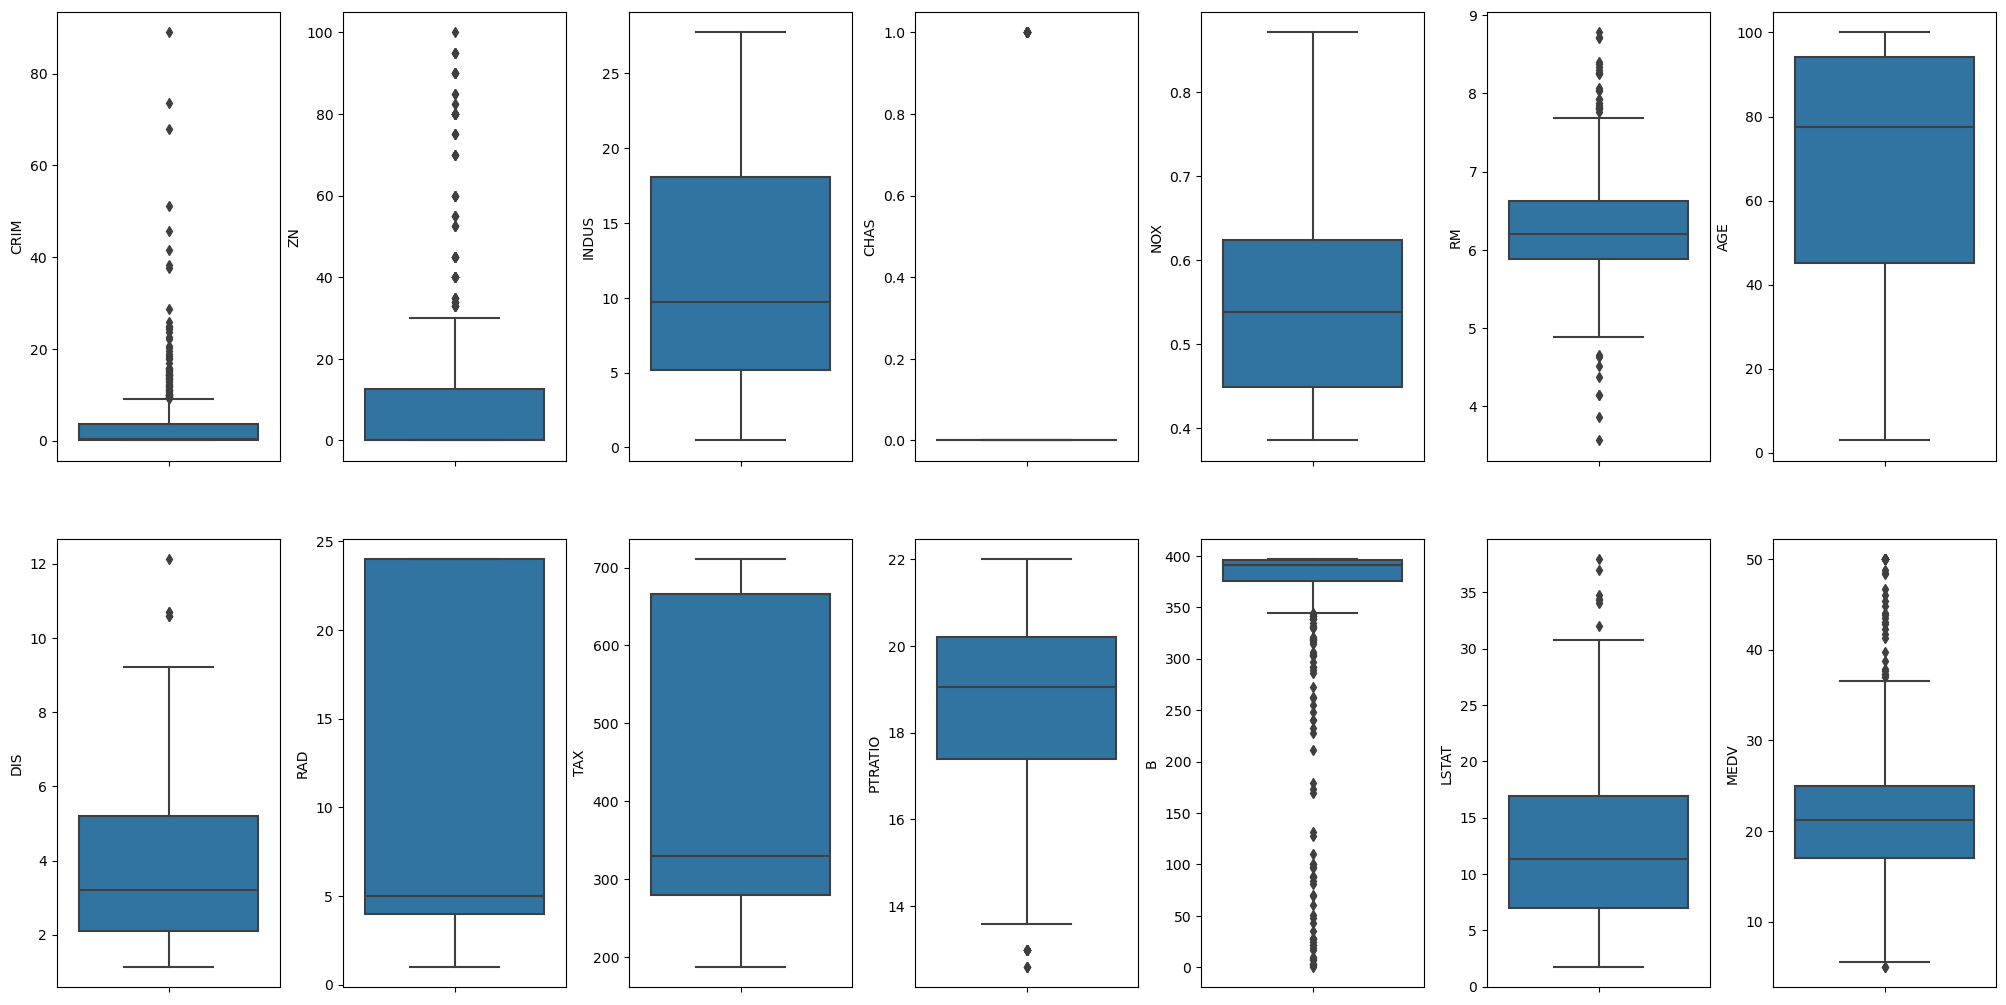

In [165]:
# Box plot for showing data distribution like variance, outliers etc.
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(data=df, y=col, ax=ax[index])
    index = index + 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

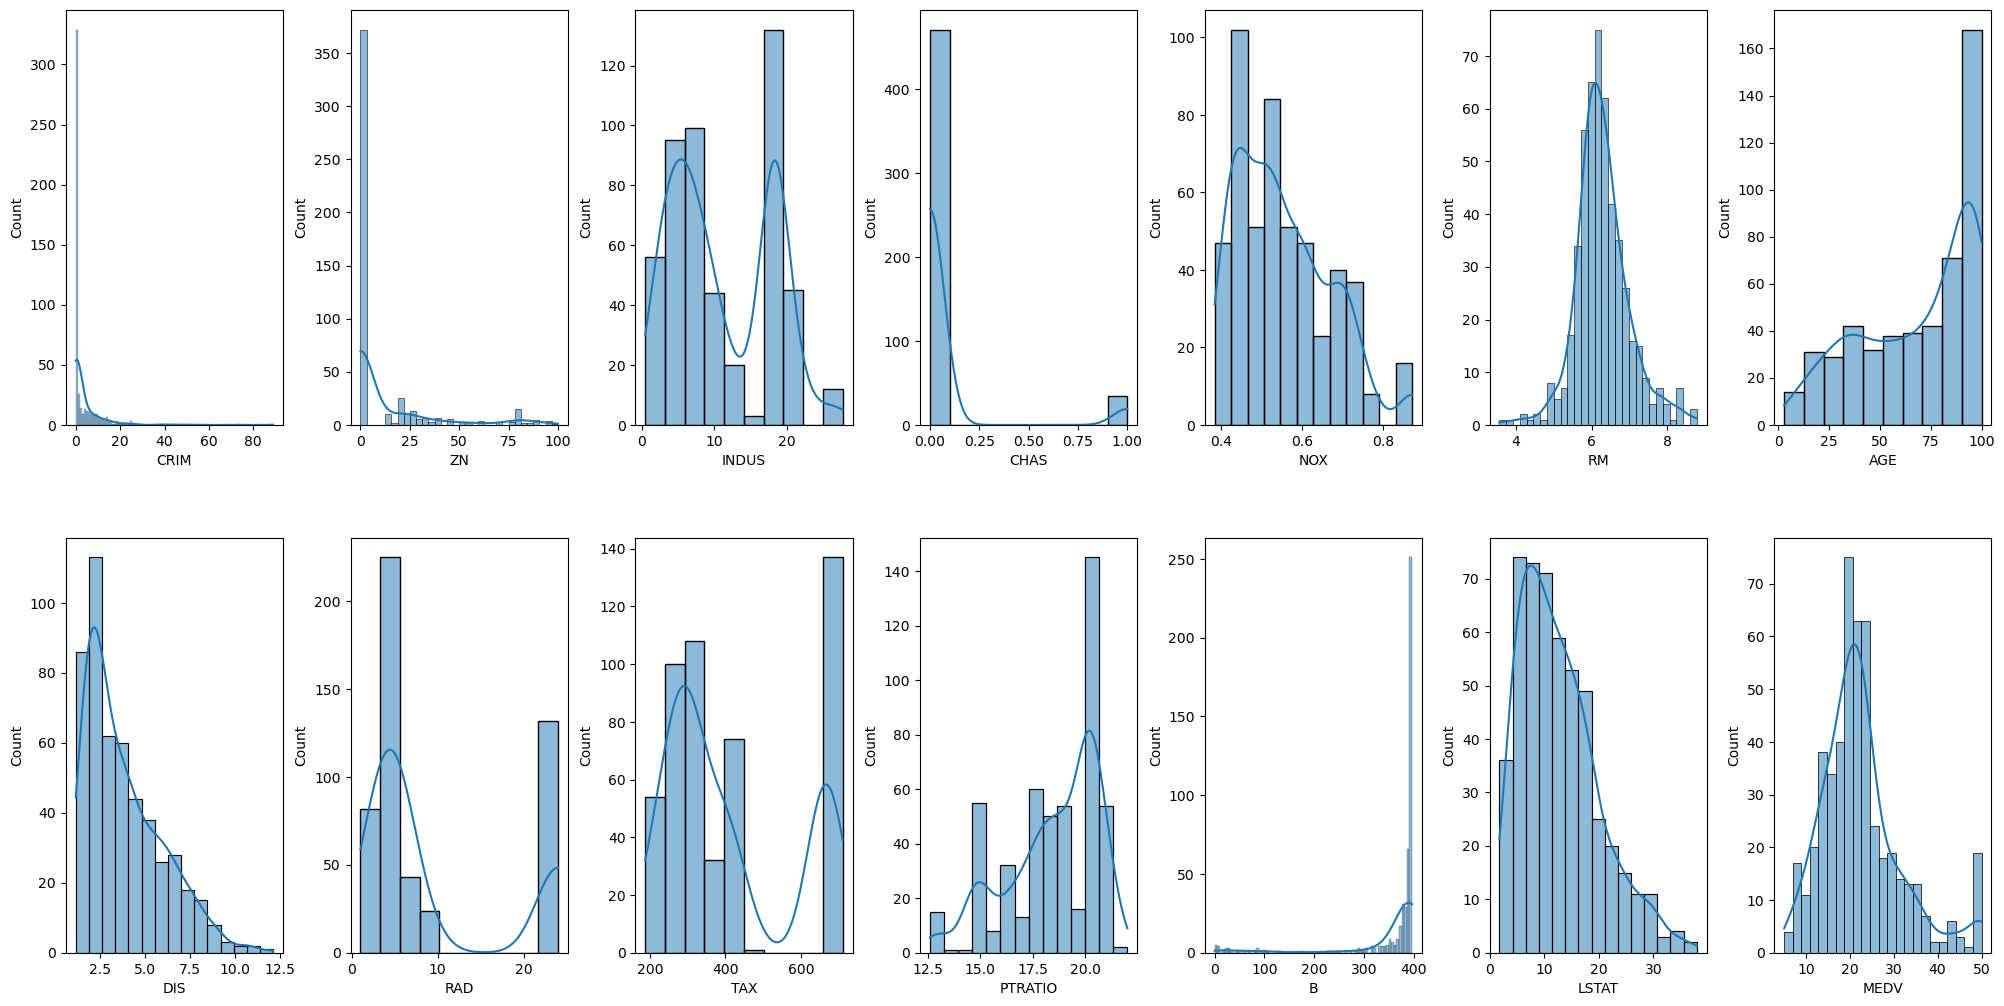

In [107]:
# hist plot for showing data distribution
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index], kde=True)
    index = index + 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

In [166]:
# Applying standardization to have mean = 0 and std dev of 1.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


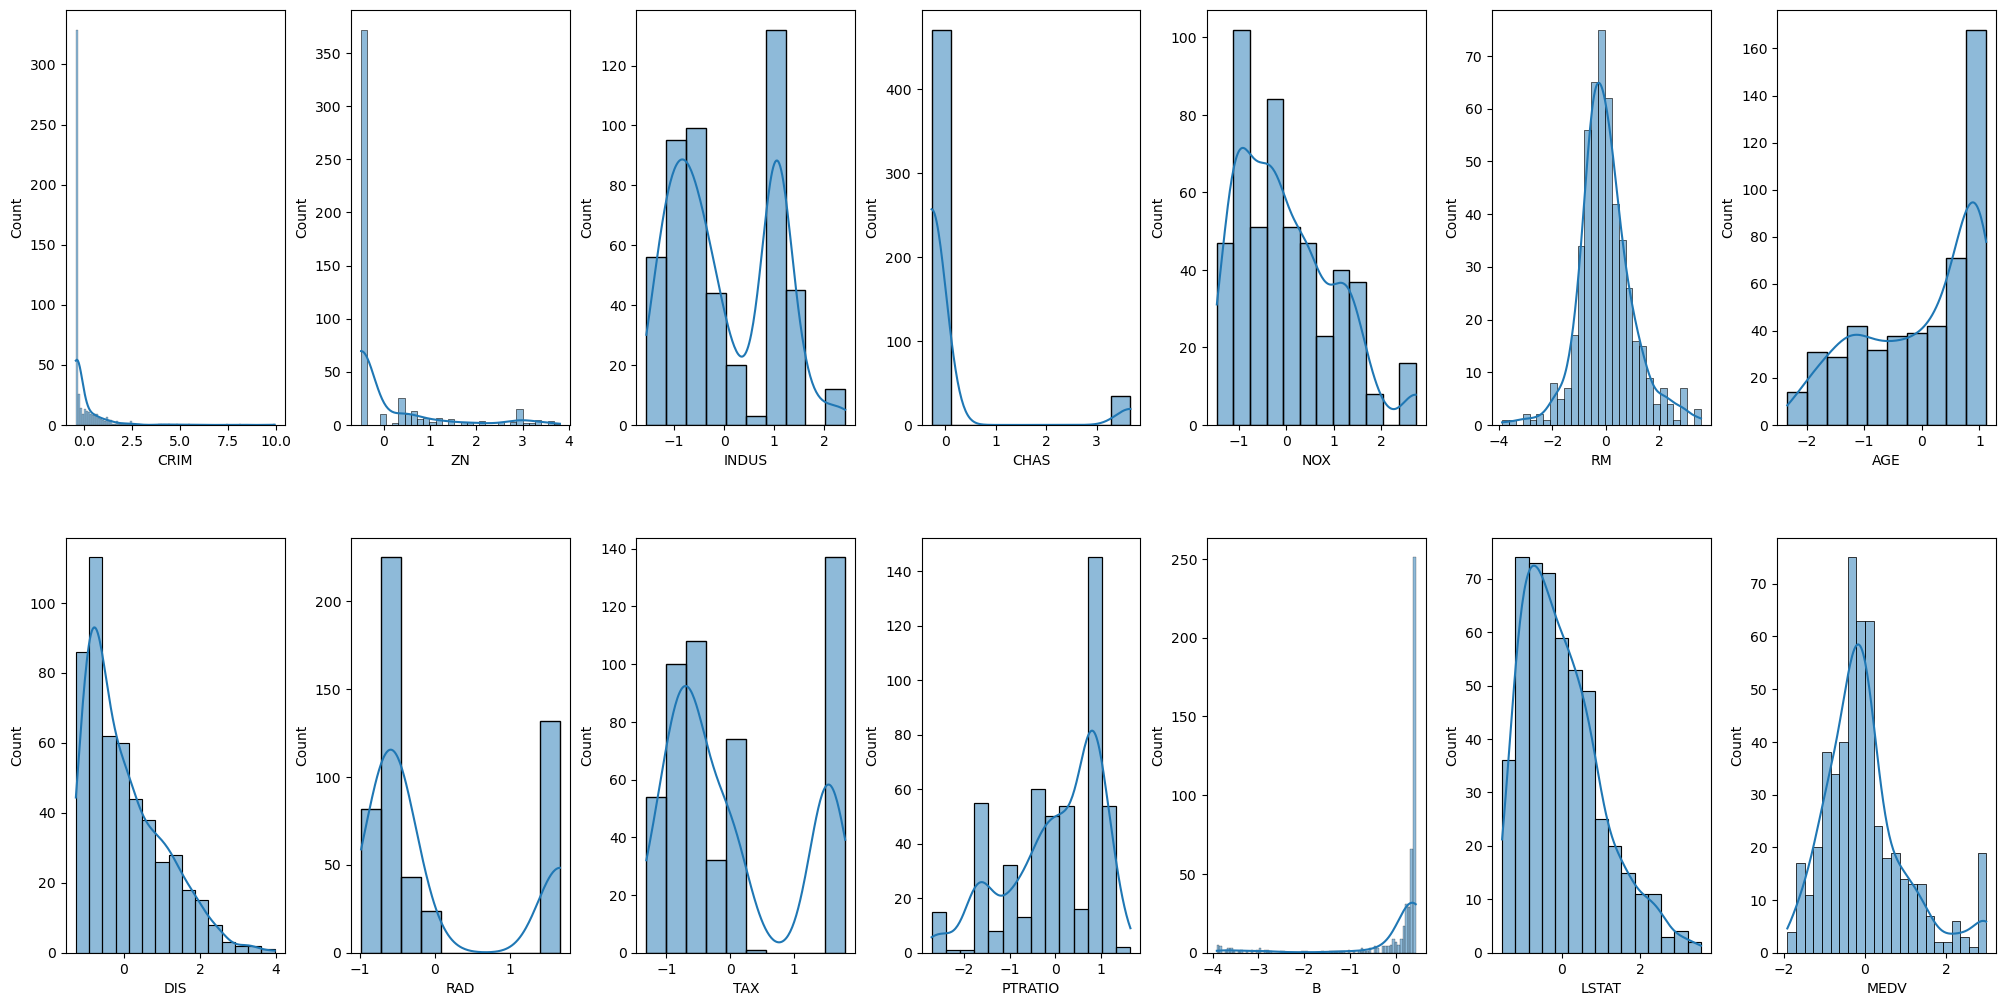

In [167]:
# hist plot for showing data distribution after standardization
fig, ax = plt.subplots(nrows=2, ncols=7, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.histplot(value, ax=ax[index], kde=True)
    index = index + 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

<Axes: >

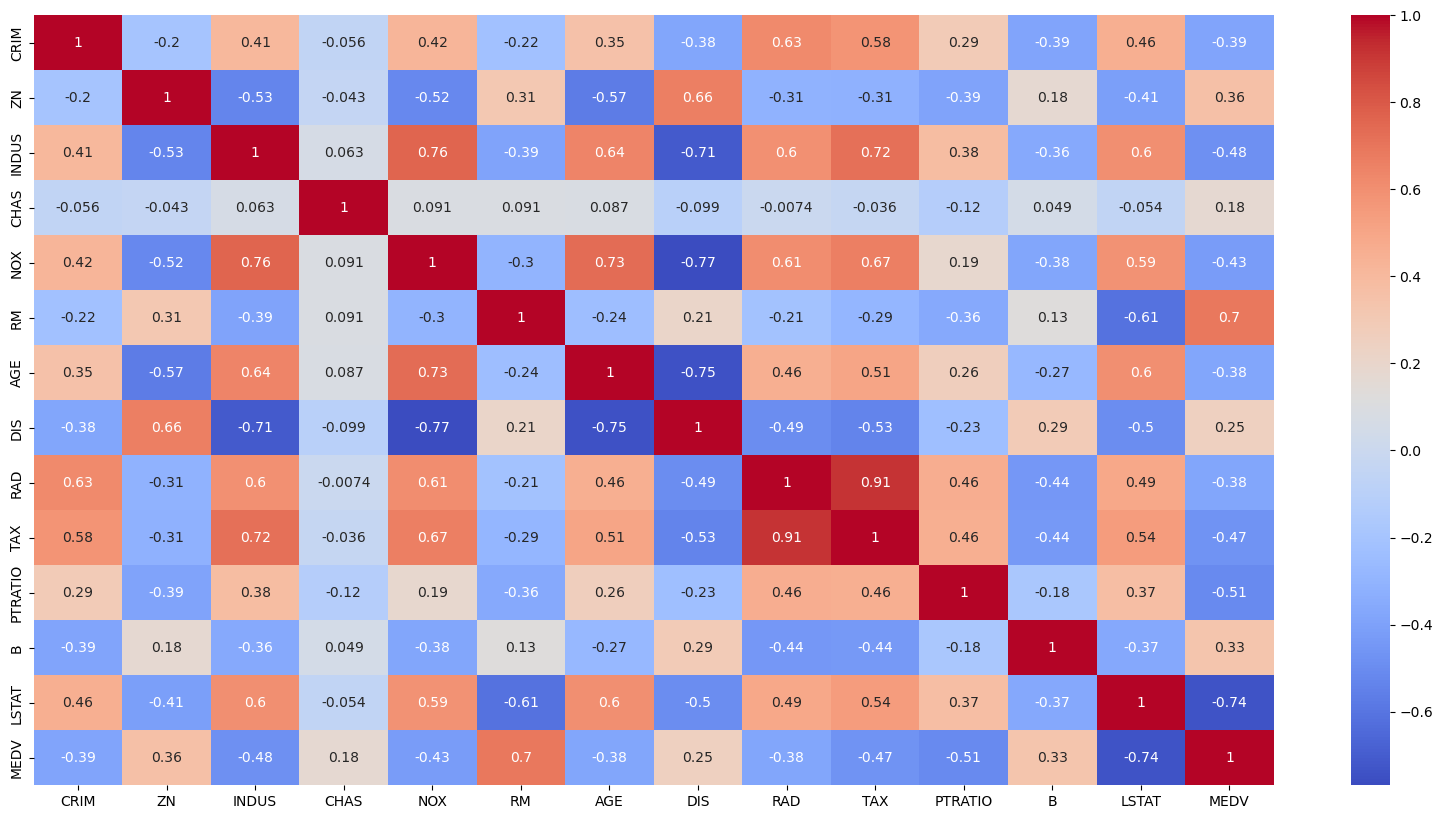

In [168]:
# Correlation matrix plot
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

<Axes: xlabel='LSTAT', ylabel='MEDV'>

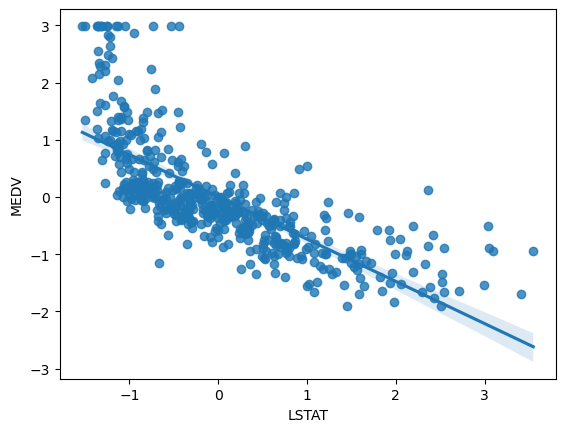

In [111]:
# Plot to visualize variables correlated with the target variable.
sns.regplot(y=df['MEDV'], x=scaled_df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

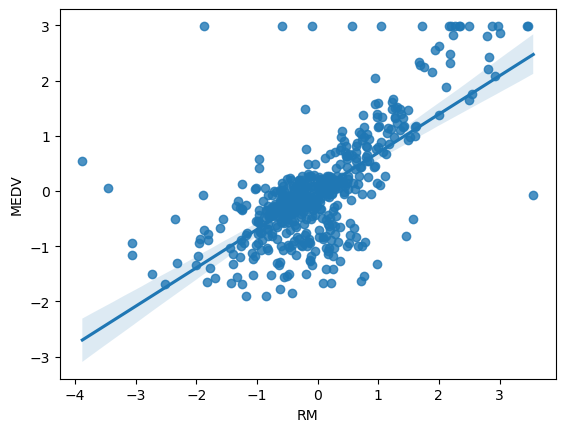

In [112]:
# Plot to visualize variables correlated with the target variable.
sns.regplot(y=df['MEDV'], x=scaled_df['RM'])

In [169]:
# Dropping RAD column as both RAD and TAX are highly correlated.
df.drop(['RAD'], axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,1.487503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.803212,1.176466,0.387217,-0.418147,-0.014454
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.803212,1.176466,0.441052,-0.500850,-0.210362
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.803212,1.176466,0.441052,-0.983048,0.148802
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.803212,1.176466,0.403225,-0.865302,-0.057989


In [170]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

X = df.drop(columns=['MEDV'], axis=1)
y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [171]:
# Apply grid search and train model 
from sklearn.model_selection import GridSearchCV

def train_and_evaluate_model(model, grid_search_params):
    grid_search = GridSearchCV(estimator=model, param_grid=grid_search_params, cv=5, n_jobs =-1)
    grid_search.fit(x_train,y_train)    
    print('Best params:', grid_search.best_params_)
    print('Best model score:', grid_search.best_score_)
    best_model = grid_search.best_estimator_
    
    # Predict on test data using the best model
    y_pred = best_model.predict(x_test)
    
    # Evaluate final model using various metrics
    from sklearn import metrics

    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test,  y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [172]:
# Apply DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
grid_search_params = {
'max_depth' : range(2,10,1),
'min_samples_leaf' : range(1,10,1),
'min_samples_split': range(2,10,1),
'splitter' : ['best', 'random']
}

train_and_evaluate_model(model, grid_search_params)


Best params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
Best model score: 0.7816529414229431
MAE: 0.32346311852305115
MSE: 0.2197508648429384
RMSE: 0.4687759217823996


In [173]:
# Apply SGDRegressor model
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
grid_search_params = {
'fit_intercept' : [True, False],
'alpha': [0.0001, 0.0005, 0.001, 0.005],
'epsilon' : [0.01, 0.05, 0.1]
}

train_and_evaluate_model(model, grid_search_params)


Best params: {'alpha': 0.001, 'epsilon': 0.1, 'fit_intercept': False}
Best model score: 0.7045856000211528
MAE: 0.4050282376116614
MSE: 0.34830345788631134
RMSE: 0.5901723967505693


In [174]:
# Apply KNeighborsRegressor model
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
grid_search_params = {
'n_neighbors' : range(5,20,5),
'weights': ['uniform', 'distance'],
'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

train_and_evaluate_model(model, grid_search_params)

Best params: {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best model score: 0.7288016297629373
MAE: 0.3373270165143843
MSE: 0.2679758527607363
RMSE: 0.5176638414654208


In [175]:
# Apply SVR model
from sklearn.svm import SVR

model = SVR()
grid_search_params = {
'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
'gamma': ['scale', 'auto']
}

train_and_evaluate_model(model, grid_search_params)

Best params: {'gamma': 'auto', 'kernel': 'rbf'}
Best model score: 0.7782002213434199
MAE: 0.30162609139527774
MSE: 0.24957213623638186
RMSE: 0.49957195301215807


In [177]:
# Apply MLPRegressor model
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
grid_search_params = {
'hidden_layer_sizes' : [(30,), (10, 10), (20, 20, 20)],
'solver': ['sgd', 'adam'],
'alpha': [0.0001, 0.0005, 0.001, 0.005],
'epsilon' : [0.01, 0.05, 0.1],
'max_iter': [2000]
}

train_and_evaluate_model(model, grid_search_params)

Best params: {'alpha': 0.005, 'epsilon': 0.01, 'hidden_layer_sizes': (20, 20, 20), 'max_iter': 2000, 'solver': 'adam'}
Best model score: 0.7953914929730805
MAE: 0.2694088682899231
MSE: 0.16162488310426643
RMSE: 0.4020259731712199


In [179]:
# Apply Adaboost model
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()
grid_search_params = {
'n_estimators' : [10, 20, 30, 50],
'loss': ['linear', 'square', 'exponential']
}

train_and_evaluate_model(model, grid_search_params)

Best params: {'loss': 'exponential', 'n_estimators': 50}
Best model score: 0.7775983881678269
MAE: 0.3001684891903893
MSE: 0.1484598157775155
RMSE: 0.38530483487430506


# Results summary:
    Model                         MAE        MSE         RMSE
    ----------------------------------------------------------
    DecisionTreeRegressor       0.3234      0.2197      0.4687
    SGDRegressor                0.4050      0.3483      0.5901
    KNeighborsRegressor         0.3373      0.2679      0.5176
    SVR                         0.3016      0.2495      0.4995
    MLPRegressor                0.2694      0.1616      0.4020
    Adaboost                    0.3001      0.1484      0.3853
    ----------------------------------------------------------
    
    MLPRegressor and Adaboost turned out to be good.